In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
url = "/Users/anushavan/Desktop/Study/Data_Science/Springboard/Capstone_1/data/cleaned_data.csv"

data = pd.read_csv(url, parse_dates=['Fully Paid','Approved','Signoff_Date'])

In [5]:
small = data.sample(frac=0.01)

### Analysis of data

Creating:
1. histograms (for categorical variables)
2. bar charts (for continuous variables) and 
3. boxplots for categorical variables (x axis) and a continuous variable (y axis).


In [6]:
data.head(2)

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158.0,-0.035313
1,1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,...,Other,NaN,NaN,MX-8,GW,N,198951,NaT,352.0,0.711858


In [7]:
# average number of building permit issued since 2000:
average = data.count()['Borough']/5

# average number of building permit issued per year 
years = (data['Fully Paid'].max() - data['Fully Paid'].min()).days/365

# average number of building permits issued per year per Borough
boro_year_average = average/years

,Borough
MANHATTAN,2224
BRONX,7417
STATEN ISLAND,11359
BROOKLYN,17062
QUEENS,21014


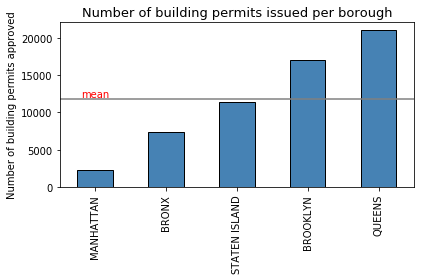

In [8]:
# create a histogram for the # of building permits issued by Borough
fig, ax = plt.subplots(figsize=(6,4))
average = (data.count()/5)['Borough']
ax = data['Borough'].value_counts().sort_values().plot(kind='bar', 
                                                       color='steelblue', edgecolor='k')
data.groupby(['Borough']).count()
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')
plt.axhline(y=average, c='grey')
plt.annotate('mean', xy=(1, 10000), xytext=(-0.2, 12000), color='r')
plt.title('Number of building permits issued per borough', fontsize=13)

plt.tight_layout()

plt.savefig('/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/figs/permits_number_byboro.png', format='png',dpi=150)

pd.DataFrame(data['Borough'].value_counts(ascending=True))


* There were almost 10x more building permits issued in Queens (21,014) than in Manhattan (2,224). 
* The average of 5 Boroughs is 11,815 building permits total (since 2000) or about 610 permits on average per year in each boro.  

In [9]:
data_1 = data[data['Duration'] > 1]

,mean,std,max
Borough,,,
BRONX,175.0,258.0,3478.0
BROOKLYN,186.0,229.0,2762.0
MANHATTAN,342.0,336.0,3585.0
QUEENS,159.0,239.0,3637.0
STATEN ISLAND,160.0,329.0,4959.0


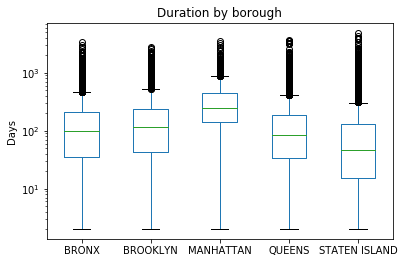

In [10]:
ax1 = data_1.boxplot(column=['Duration'], by=['Borough'])
plt.suptitle('')
ax1.set_xlabel('')
ax1.set_ylabel('Days')
ax1.grid(False)
ax1.set_title('Duration by borough')
ax1.set_yscale('log')

pd.DataFrame(data_1.groupby('Borough')['Duration'].
             describe().loc[:,['mean','std','max']].round())

,mean,std,max
Borough,,,
BRONX,165.0,254.0,3478.0
BROOKLYN,179.0,227.0,2762.0
MANHATTAN,333.0,336.0,3585.0
QUEENS,154.0,237.0,3637.0
STATEN ISLAND,143.0,315.0,4959.0


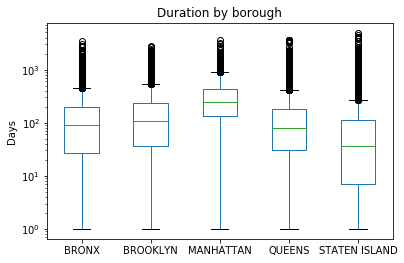

In [11]:
# boxplot of duration of issuance of building permit by Borough.
ax1 = data.boxplot(column=['Duration'], by=['Borough'])
plt.suptitle('')
ax1.set_xlabel('')
ax1.set_ylabel('Days')
ax1.grid(False)
ax1.set_title('Duration by borough')
ax1.set_yscale('log')

pd.DataFrame(data.groupby('Borough')['Duration'].
             describe().loc[:,['mean','std','max']].round())
# plt.savefig('/Users/anushavan/Desktop/Study/\
# Data_Science/Springboard/Capstone_1/figs/duration_byboro.png', format='png',dpi=150)



#### Duration of building permit issuance by Borough

* On average it takes the longest in Manhattan and shortest in Staten Island to obtain a building permit. 
* In Manhattan, it takes on average 11 months (333 days) to obtain a building permit, which is almost twice as long as in the rest of the 4 Boroughs. 
* However, there is also significant variance in Manhattan in the duration. 

In [12]:
# Group by data by boroughs and select the average duration based on the type of building.
# Group by data by boroughs and select the number of buildings based on the type of building.
bldg_type = pd.DataFrame(data.groupby(['Borough','Building Type']).count()['Approved'])
bldg_type_piv = (pd.pivot_table
                 (bldg_type, index='Borough', columns=['Building Type'], 
                  values='Approved').sort_values(by='1-2-3 FAMILY'))

group = pd.DataFrame(data.groupby(['Borough','Building Type'])['Duration'].mean())
group_piv = pd.pivot_table(index='Borough', columns='Building Type', 
                          values='Duration', data=group)

#### Discussion: the type of buildings approved 

* The majority (>70%) of building permits were issued for 1,2 or 3 family buildings. This ratio varies significantly across the 5 Boroughs. 
* Manhattan is the only borough where the majority of the building permits where issued for the "Others" category, meaning anything other than 1,2 or 3 family houses. 
* The duration for obtaining a building permit is longer for "Others" category buildings than "1, 2 or 3 family" houses, by on average 79 days. 

In [13]:
# Pivot the data to get borough level duration for applicants that applied online vs those who 
# did not apply online.

efile_boro = data.groupby(['Borough','Efiling Filed'])['Duration'].mean()
efile_pivot = pd.pivot_table(pd.DataFrame(efile_boro), 
                             index='Borough', columns='Efiling Filed')

#### Discussion: E-filing for building permits
* The applicants that have NOT filed the application online seem to obtain the approval faster. We need to explore this further to understand the reason. 
* Looking into the data by borough we can see that this is true for all boroughs. However, the difference is very small in Manhattan.

,Applicant Professional Title
RA,44086
PE,14990


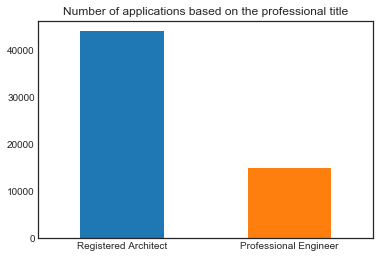

In [14]:
# Create a bar chart of Professional Title and include a statistical analysis.
plt.style.use('seaborn-white')
fig, ax = plt.subplots()
data['Applicant Professional Title'].value_counts().plot(kind='bar', ax = ax)
ax.set_xticklabels(['Registered Architect', 'Professional Engineer'],rotation=360)
ax.set_title('Number of applications based on the professional title')
pd.DataFrame(data['Applicant Professional Title'].value_counts())

,mean,std,max
Applicant Professional Title,,,
PE,143.0,229.0,4959.0
RA,176.0,269.0,4411.0


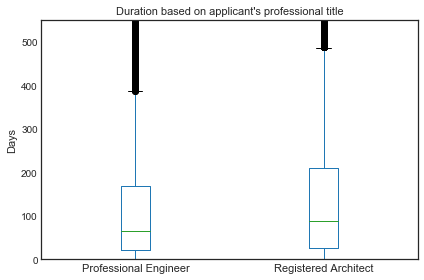

In [15]:
# Boxplot of Duration based on the applicants' professional title.
fig, ax = plt.subplots()
data.boxplot(column=['Duration'], by=['Applicant Professional Title'], ax=ax)
ax.set_xticklabels(['Professional Engineer','Registered Architect'], fontsize=11)
plt.suptitle("")
ax.set_title("Duration based on applicant's professional title", fontsize=11)
ax.set_xlabel('')
ax.set_ylabel('Days', fontsize=11)
ax.set_ylim(0,550)
ax.grid(False)
plt.tight_layout()
pd.DataFrame(data.groupby('Applicant Professional Title')['Duration'].
             describe().loc[:,['mean','std','max']].round())

,Professional Cert
N,38010
Y,21066


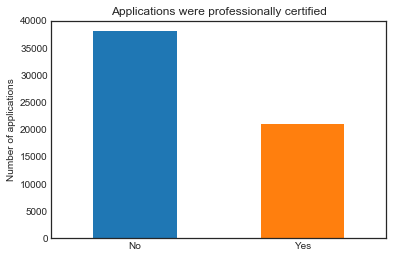

In [16]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data['Professional Cert'].value_counts().plot(kind='bar')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data['Professional Cert'].value_counts())

,mean,std,max
Professional Cert,,,
N,225.0,283.0,4959.0
Y,62.0,166.0,2589.0


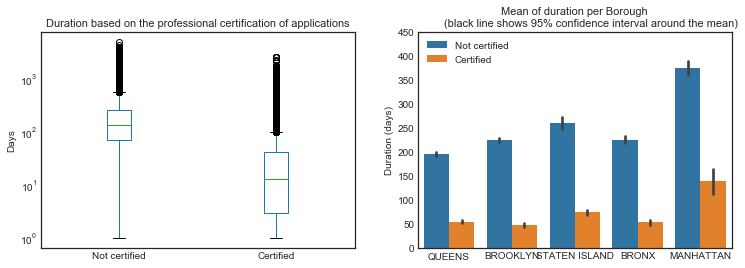

In [17]:
# boxplot of Duration based on wheather or not the applications were professionally certified.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
data.boxplot(column=['Duration'], by=['Professional Cert'], ax=ax1)
ax1.set_xticklabels(['Not certified','Certified'])
plt.suptitle('')
ax1.set_title("Duration based on the professional certification of applications", fontsize=11)
ax1.set_xlabel('')
ax1.set_ylabel('Days')
ax1.set_yscale('log')
ax1.grid(False)
ax1.yaxis.set_ticks_position('none')
plt.savefig('/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/figs/duration_by_cert.png', format='png', dpi=150)

# mean duration of approval in each borough based on the professional certification.
sns.barplot(x ='Borough', y ='Duration', hue='Professional Cert', data=data, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Duration (days)')
ax2.set_ylim(0,450)
ax2.set_title('Mean of duration per Borough' '\n \
          (black line shows 95% confidence interval around the mean)', fontsize=11)

legend = ax2.legend()
legend.get_texts()[0].set_text('Not certified')
legend.get_texts()[1].set_text('Certified')
pd.DataFrame(data.groupby('Professional Cert')['Duration'].
             describe().loc[:,['mean','std','max']].round())

#### Discussion: professionaly certified applications

From data we can observe that professionally certified applications are approved significantly faster than those that are not certified.  This makes sense because professionally certified application materials are less prone to errors and reduce the back and forth between the issuing agency and the applicant. 


,Total Est. Fee
mean,3950.0
std,84871.0
50%,614.0
max,16900000.0


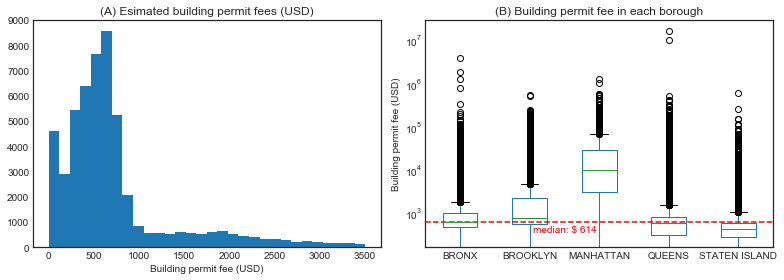

In [18]:
# histogram of building permit fee.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,4))
data['Total Est. Fee'].hist(bins=30, range=(0,3500), ax=ax1)
ax1.set_title('(A) Esimated building permit fees (USD)')
ax1.set_xlabel('Building permit fee (USD)')
ax1.grid(False)

# boxplot of the fees by borough.
data.boxplot(column='Total Est. Fee', by='Borough', ax=ax2)
ax2.set_yscale('log')
ax2.grid(False)
ax2.set_title('(B) Building permit fee in each borough')
plt.suptitle('')
ax2.set_xlabel('')
ax2.set_ylabel('Building permit fee (USD)')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.axhline(y=614, color='red', linestyle='--')
ax2.annotate('median: $ 614', xy=(3,620), xytext=(2.05,350), color='red')
plt.tight_layout() 
plt.tight_layout()
pd.DataFrame(data['Total Est. Fee'].describe().loc[['mean','std','50%','max']].round())

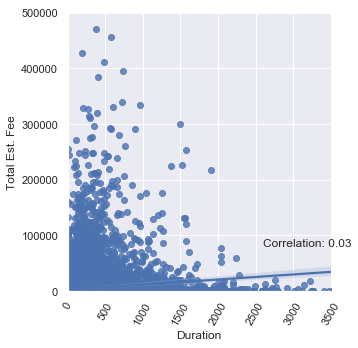

In [39]:
# scatterplot of building permit fee and Duration and the correlation value. 
g = sns.lmplot(x='Duration',y='Total Est. Fee', data=data)
plt.xlim(0,3500)
plt.ylim(0,500000)
plt.xticks(rotation=60)
plt.tight_layout()
data['Total Est. Fee'].corr(data['Duration']).round(3)
ax = g.ax
ax.annotate('Correlation: ' + str(data['Total Est. Fee'].corr(data['Duration']).round(2)),
            xy=(2600,80000), xytext=(2600,80000));

#### Discussion: 
* The highest fees are in Manhattan and the lowest fees are in Staten Island. 
* Building permit fees range from USD 0 to more than several million dollars. 
* However, most of the building permit applicants pay between USD 0 and USD 3,500 with a median fee of USD 614.  
* There seems to be no correlation between the estimated fee and the duration of approval. However, there are significant outliers in both variables that might affect the correlation value. 

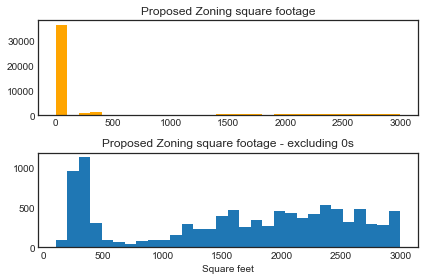

In [20]:
# Histogram of Proposed Zoning square footage. 
fig, ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Proposed Zoning Sqft'].hist(bins=30, range=(0,3000), color='orange')
ax.set_title('Proposed Zoning square footage')
# ax.set_xlabel('Square feet')
ax.grid(False)
pd.DataFrame((data['Proposed Zoning Sqft']).describe()).round(1)

plt.subplot(2,1,2)
ax1 = data['Proposed Zoning Sqft'].hist(bins=30, range=(100,3000))
ax1.set_title('Proposed Zoning square footage - excluding 0s')
ax1.set_xlabel('Square feet')
ax1.grid(False)
plt.tight_layout()

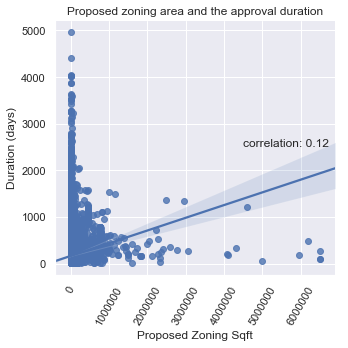

In [38]:
# scatterplot of proposed zoning square feet vs Duration.
g = sns.lmplot(x='Proposed Zoning Sqft', y='Duration', data=data);
# plt.xscale('log')
# plt.ylim(0,5000)
plt.xticks(rotation=60)
plt.title('Proposed zoning area and the approval duration')
plt.ylabel('Duration (days)')
plt.tight_layout()
cor_zon_dur = data['Proposed Zoning Sqft'].corr(data['Duration']).round(2)
g.ax.annotate('correlation: '+ str(cor_zon_dur), xy=(4500000,2500), xytext=(4500000,2500));

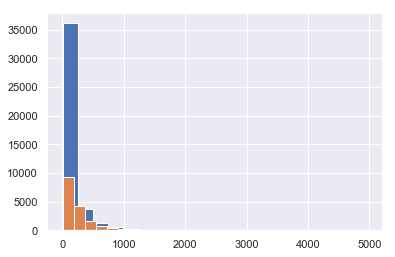

In [36]:
sns.set()
data.groupby(by='Building Type')['Duration'].hist(bins=20);

In [48]:
x = np.arange(0,1,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [49]:
# define empirical cumulative distribution function (ECDF)

def ecdf(data):
    ''' takes the data and returns the x and y values where x is the sorted data and
    y is the cumulative proportion of the distribution of data. The result can be used for 
    plotting an empirical cumulative distribution function (ECDF).
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [51]:
# plot the ecdf of the duration
x, y = ecdf(data['Duration'])

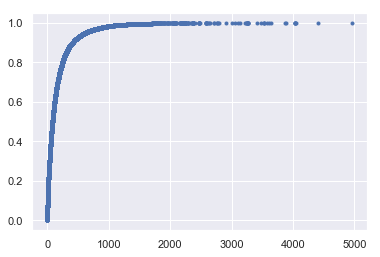

In [57]:
plt.plot(x,y, marker='.', linestyle='None')